In [1]:
%matplotlib inline
import sys, os
import numpy

In [2]:
import yt.utilities.math_utils as mu

In [3]:
os.environ['PYOPENGL_PLATFORM'] = 'egl'
import yt
import yt_idv
#import widgyts

In [4]:
# make a 64^3 grid with:
#  dark box outline (0.125)
#  XYZ crosshair of radius 0.5, centered at (0,0,0)
#    with X axis = 0.25, Y axis = 0.45, Z axis = 0.85
#  Small blob at 0.5,0.5,0.5 (box center) = 0.5
#  Small blob at 0.5,0.5,1.0 (middle of +Z face) = 1.0

grid = numpy.zeros( (64,64,64))

for edA in slice(0,2), slice(62,64):
    for edB in slice(0,2), slice(62,64):
        grid[edA, edB, 0:64] = 0.125
        grid[edB, 0:64, edA] = 0.125
        grid[0:64, edA, edB] = 0.125
        
grid[31:34, 31:34, 31:34] = 0.5
grid[60:64, 31:34, 28:35] = 1.0
grid[0:4, 0:4, 13:32] = 0.25
grid[0:4, 0:32, 0:4] = 0.45
grid[0:32, 0:4, 0:4] = 0.85


datad = dict(Density=grid)

In [5]:
with open('gridbox.speck','w') as outf:
    print("#! /usr/bin/env partiview", file=outf)
    print("datavar 0 val", file=outf)
    print("eval color val 1 0", file=outf)
    print("", file=outf)
    for z in range(64):
        for y in range(64):
            for x in range(64):
                if grid[z,y,x] > 0:
                    print("%g %g %g %g" % (x/64., y/64., z/64., grid[z,y,x]), file=outf)

In [6]:
bbox = numpy.array( [ [0,1], [0,1], [0,1] ])
ds = yt.load_uniform_grid( datad, grid.shape, 1.0, bbox=bbox )

yt : [INFO     ] 2022-03-28 11:29:22,030 Parameters: current_time              = 0.0
yt : [INFO     ] 2022-03-28 11:29:22,032 Parameters: domain_dimensions         = [64 64 64]
yt : [INFO     ] 2022-03-28 11:29:22,033 Parameters: domain_left_edge          = [0. 0. 0.]
yt : [INFO     ] 2022-03-28 11:29:22,035 Parameters: domain_right_edge         = [1. 1. 1.]
yt : [INFO     ] 2022-03-28 11:29:22,036 Parameters: cosmological_simulation   = 0


yt : [INFO     ] 2022-03-28 11:29:22,399 xlim = -0.490000 0.510000
yt : [INFO     ] 2022-03-28 11:29:22,399 ylim = -0.490000 0.510000
yt : [INFO     ] 2022-03-28 11:29:22,401 xlim = -0.490000 0.510000
yt : [INFO     ] 2022-03-28 11:29:22,401 ylim = -0.490000 0.510000
yt : [INFO     ] 2022-03-28 11:29:22,405 Making a fixed resolution buffer of (('stream', 'Density')) 800 by 800



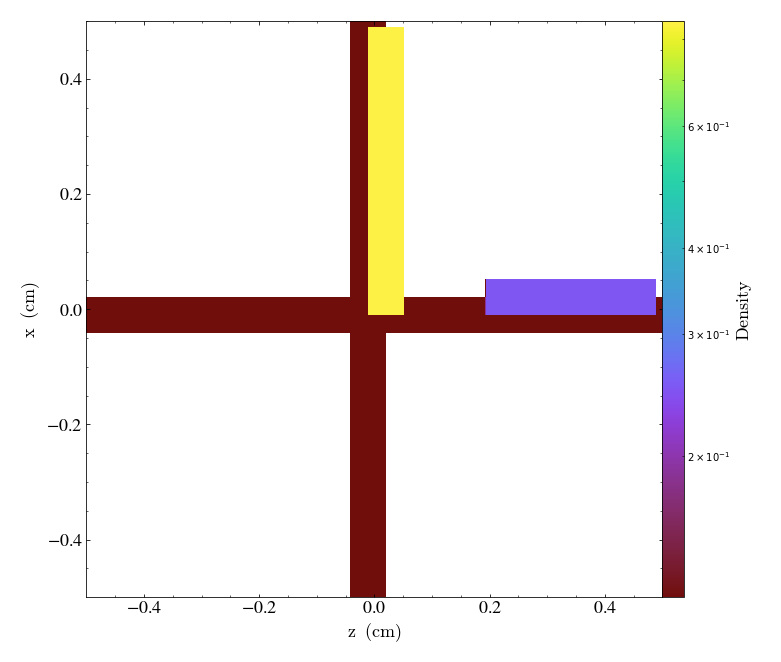

In [7]:
yt.SlicePlot(ds, 'y', 'Density', center=(.01,.01,.01))

yt : [INFO     ] 2022-03-28 11:29:23,521 xlim = 0.000000 1.000000
yt : [INFO     ] 2022-03-28 11:29:23,522 ylim = 0.000000 1.000000
yt : [INFO     ] 2022-03-28 11:29:23,523 xlim = 0.000000 1.000000
yt : [INFO     ] 2022-03-28 11:29:23,524 ylim = 0.000000 1.000000
yt : [INFO     ] 2022-03-28 11:29:23,527 Making a fixed resolution buffer of (('stream', 'Density')) 800 by 800



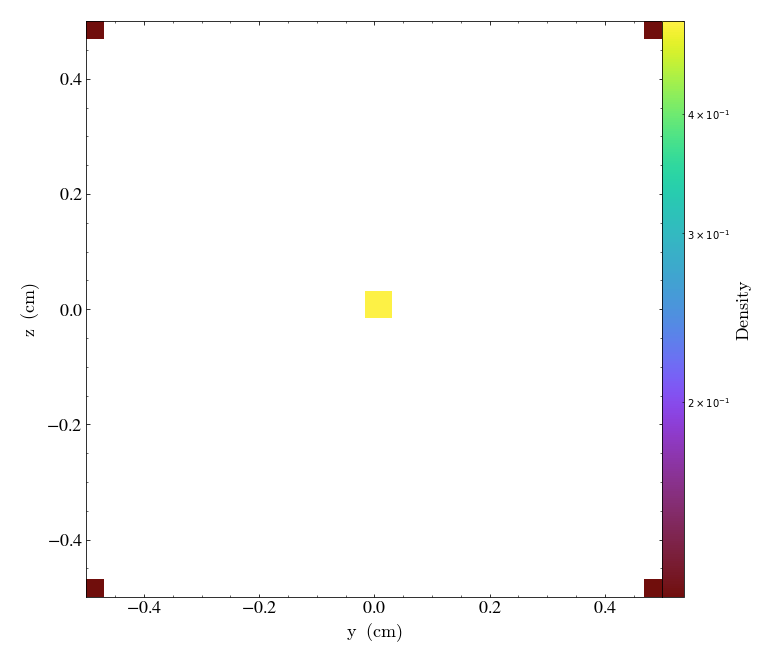

In [8]:
yt.SlicePlot(ds,'x','Density')

In [9]:
rc = yt_idv.render_context(engine='egl', gui=True, width=1200, height=1200)

In [10]:
sg = rc.add_scene(ds, 'Density', no_ghost=True)

In [11]:
print("cmap_log = ", sg.components[0].cmap_log)
sg.components[0].cmap_log = False

cmap_log =  True


In [12]:
im = rc.run()

Computed new cmap values 0.0001220703125 - 1.0


In [13]:
import matplotlib.pyplot as mp



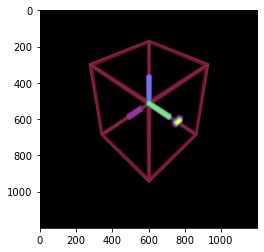

In [14]:
mp.imshow(rc.scene.image)


In [15]:
rc.scene.camera.view_matrix

array([[ 7.0710677e-01, -3.2201111e-08, -7.0710683e-01,  6.1707262e-08],
       [-4.0824831e-01,  8.1649661e-01, -4.0824834e-01,  3.5626705e-08],
       [ 5.7735032e-01,  5.7735032e-01,  5.7735026e-01, -3.4641018e+00],
       [ 0.0000000e+00,  0.0000000e+00,  0.0000000e+00,  1.0000000e+00]],
      dtype=float32)

In [16]:
sg.components[0].cmap_log

False

In [17]:
# Construct a new matrix using yt math_utils
# Viewpoint is on the midplane of the box, with the X axis pointed mostly towards us.

T = mu.get_lookat_matrix([3,2,.5], [.5,.5,.5], [0,1,0])
rc.scene.camera.view_matrix = T

im = rc.run()

In [18]:
rc.add_image()
# Note that:
#  the blob in the middle of the box at .5,.5,.5 is missing
#  the blob in the middle of the +Z face at .5,.5,1 is missing too
#  there are diagonal lines across several faces of the grid that shouldn't be there
#  the X axis isn't pointing toward us -- instead, the Z axis (brightest one) is
#So:
#  Is get_lookat_matrix() appropriate for computing the scene.camera.view_matrix?
#  Is assigning to view_matrix the right thing to do?
#  Should I need to assign to anything else too?

Image(value=b'\x89PNG\r\n\x1a\n\x00\x00\x00\rIHDR\x00\x00\x04\xb0\x00\x00\x04\xb0\x08\x06\x00\x00\x00\xeb!\xb3…

In [19]:
import tfm


In [20]:
# making guesses as to how to turn this into partiview/virtual-director form, which uses a camera-to-world style
# The view matrix looks like it might be the inverse transpose of an opengl camera-to-world matrix, in the sense
# p_cam * Tc2w = p_world
def p(vec):
    return " ".join("%g" % (0 if abs(v)<1e-7 else v) for v in vec);

print("jump", p(tfm.tfm2vd( tfm.tmul(tfm.tfm('z',0),numpy.linalg.inv(T.transpose())))))


jump 3 2 0.5 -30.9638 90 0


In [21]:
sc = yt.create_scene(ds, lens_type='perspective', field='Density')
source = sc[0]
source.set_field('Density')
source.set_log(False)


<Volume Source>:YTRegion (UniformGridData): , center=[0.5 0.5 0.5] cm cm, left_edge=[0. 0. 0.] cm cm, right_edge=[1. 1. 1.] cm cm transfer_function:None

In [22]:
bounds = (0, 1)
tf = yt.ColorTransferFunction(bounds)
tf.add_gaussian( 0.25, width=.01, height=[1,0,0,1])
tf.add_gaussian( 0.45, width=.01, height=[0,1,0,1])
tf.add_gaussian( 0.85, width=.01, height=[0,0,1,1])
tf.add_gaussian( 0.5, width=.01, height=[.5,.5,.5,1])
tf.add_gaussian( 1.0, width=.01, height=[0,1,.6,.5])


In [23]:
import matplotlib.pyplot as mp

yt : [INFO     ] 2022-03-28 11:29:26,258 Rendering scene (Can take a while).
yt : [INFO     ] 2022-03-28 11:29:26,260 Creating volume
yt : [INFO     ] 2022-03-28 11:29:26,294 Creating transfer function
yt : [INFO     ] 2022-03-28 11:29:26,295 Calculating data bounds. This may take a while. Set the TransferFunctionHelper.bounds to avoid this.


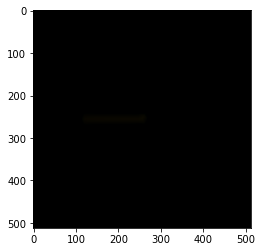

In [24]:
mp.imshow(sc.render())

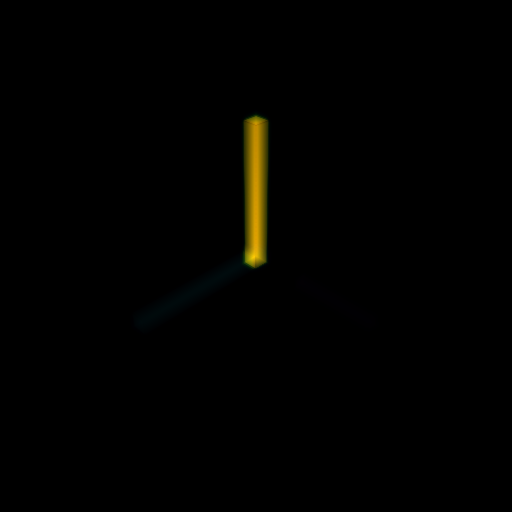

In [25]:
sc

In [26]:
sc.camera.lens

<Lens Object>:
	lens_type:perspective
	viewpoint:[0.0669873 0.0669873 0.0669873] code_length code_length

In [27]:
sc.camera.lens.viewpoint

unyt_array([0.0669873, 0.0669873, 0.0669873], 'code_length')

In [28]:
dir(sc.camera.lens)

['__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_distributed',
 '_finalize_parallel',
 '_get_grid_objs',
 '_get_grids',
 '_get_objs',
 '_get_sampler_params',
 '_grids',
 '_initialize_parallel',
 'back_center',
 'box_vectors',
 'comm',
 'current_image',
 'front_center',
 'get_dependencies',
 'new_image',
 'num_threads',
 'origin',
 'partition_index_2d',
 'partition_index_3d',
 'partition_index_3d_bisection_list',
 'partition_region_3d',
 'project_to_plane',
 'sampler',
 'set_camera',
 'set_viewpoint',
 'setup_box_properties',
 'sub_samples',
 'viewpoint']

In [29]:
sc.camera.lens.set_viewpoint( [1,1,.5])

yt : [INFO     ] 2022-03-28 11:29:38,134 Rendering scene (Can take a while).


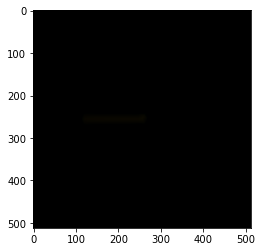

In [30]:
mp.imshow(sc.render())

In [31]:
sc.render()

ImageArray([[[0., 0., 0., 1.],
             [0., 0., 0., 1.],
             [0., 0., 0., 1.],
             ...,
             [0., 0., 0., 1.],
             [0., 0., 0., 1.],
             [0., 0., 0., 1.]],

            [[0., 0., 0., 1.],
             [0., 0., 0., 1.],
             [0., 0., 0., 1.],
             ...,
             [0., 0., 0., 1.],
             [0., 0., 0., 1.],
             [0., 0., 0., 1.]],

            [[0., 0., 0., 1.],
             [0., 0., 0., 1.],
             [0., 0., 0., 1.],
             ...,
             [0., 0., 0., 1.],
             [0., 0., 0., 1.],
             [0., 0., 0., 1.]],

            ...,

            [[0., 0., 0., 1.],
             [0., 0., 0., 1.],
             [0., 0., 0., 1.],
             ...,
             [0., 0., 0., 1.],
             [0., 0., 0., 1.],
             [0., 0., 0., 1.]],

            [[0., 0., 0., 1.],
             [0., 0., 0., 1.],
             [0., 0., 0., 1.],
             ...,
             [0., 0., 0., 1.],
             [0.

In [32]:
import yt.visualization.volume_rendering as vr

In [33]:
vs = vr.render_source.VolumeSource( ds, field='Density')

TypeError: Can't instantiate abstract class VolumeSource with abstract methods _get_volume, render

In [ ]:
vs

In [ ]:
help(vs.tfh)